In [2]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 
import pandas as pd

  0%|          | 0/79 [00:00<?, ?it/s]

/home/kate/projects/qc_preprocessing/5_ss_shared_bgpd/


  1%|▏         | 1/79 [00:04<06:05,  4.68s/it]


KeyboardInterrupt: 

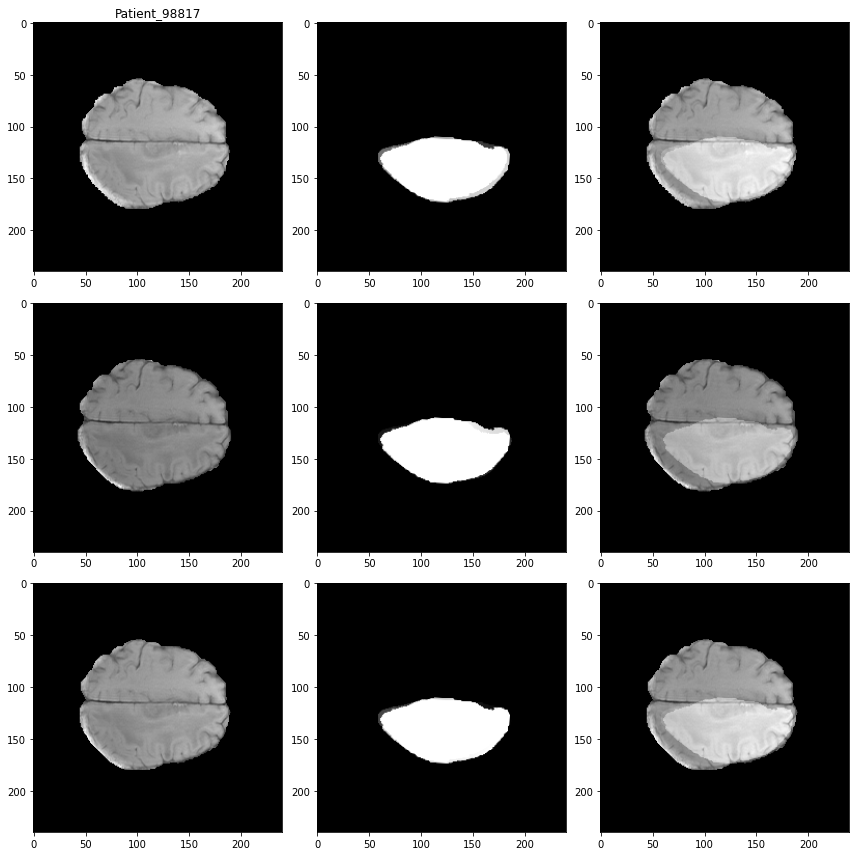

In [16]:
import tqdm
path = '5_ss_shared'

print('/home/kate/projects/qc_preprocessing/{}_bgpd/'.format(path))
os.makedirs('/home/kate/projects/qc_preprocessing/{}_bgpd/'.format(path), exist_ok = True)

def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/{path}_bgpd/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

output = '/anvar/public_datasets/preproc_study/bgpd/{}/'.format(path)

for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/T1.nii.gz')
        mask = ants.image_read(output + patient +'/mask_GTV_FLAIR.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

In [14]:
scp -r notebook_airi:/home/kate/projects/qc_preprocessing/4a_resamp_bgpd/ /mnt/d/

SyntaxError: invalid syntax (1154986373.py, line 1)